In [ ]:
# Just the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


Followed from the Tutorial on GeeksforGeeks

https://www.geeksforgeeks.org/spaceship-titanic-project-using-machine-learning-python/

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Loads the dimenions of the dataset
df.shape

(4277, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


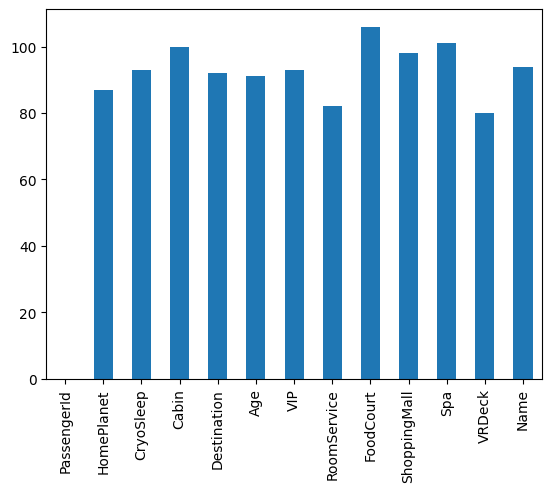

In [ ]:

df.isnull().sum().plot.bar()
plt.show()

In [21]:
col = df.loc[:, 'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,215.763334,405.711610,174.269240,274.936207,291.327467
True,519.905405,1747.378378,343.611111,1403.833333,1131.239437


In [22]:
df.groupby('CryoSleep')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,347.104489,701.532841,281.569988,474.511421,493.671042
True,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0

In [24]:
for c in col:
    for val in [True, False]:
        temp = df[c] == val
        k = df.loc[temp, col].astype(float).mean()
        df.loc[temp, c] = df.loc[temp, c].fillna(k)


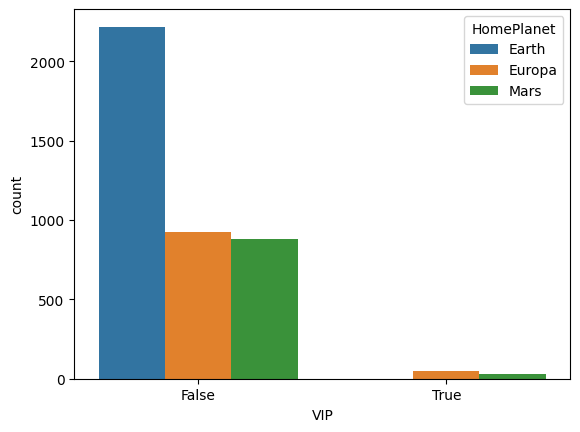

In [25]:
sb.countplot(data=df, x='VIP', hue='HomePlanet')
plt.show()

In [26]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')

temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')

<Axes: ylabel='Age'>

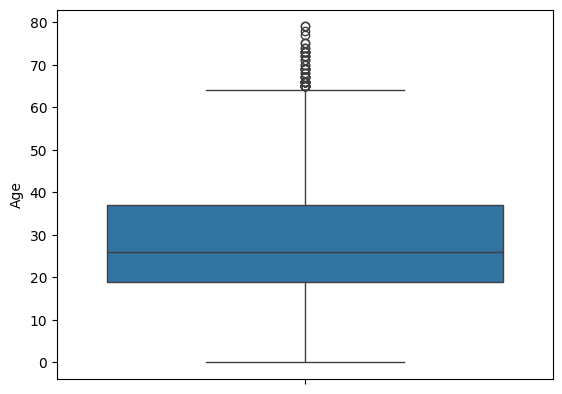

In [27]:
sb.boxplot(df['Age'], orient='vertical')

In [28]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)

In [30]:
for col in df.columns:
    # Check for null values presence
    if df[col].isnull().sum() == 0:
        continue
        
    # If the data type is categorical filling by mode.
    if df[col].dtype == object or df[col].dtype == bool:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # Else by mean
    else:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


np.int64(0)

In [31]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [32]:
new = df["PassengerId"].str.split("_", n=1 , expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)

df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [33]:
data = df['RoomNo']
for i in range(df.shape[0]):
    temp = data == data[i]
    df['PassengerNo'][i] = (temp).sum()

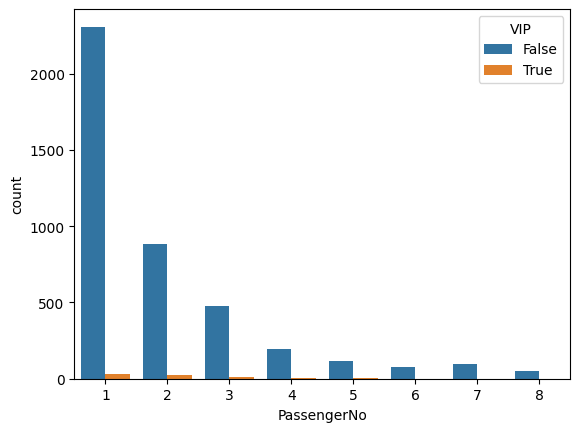

In [34]:
df.drop(['RoomNo'], axis=1, inplace=True)
sb.countplot(data=df, x='PassengerNo', hue='VIP')
plt.show()

In [35]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]

df.drop(['Cabin'], axis=1, inplace=True)

In [36]:
df['LeasureBill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

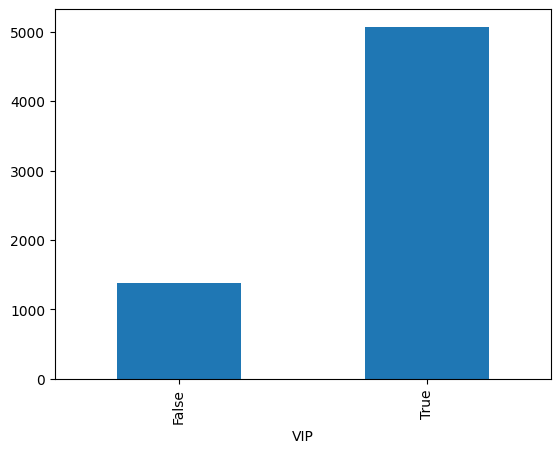

In [40]:
df.groupby('VIP').mean(numeric_only = True)['LeasureBill'].plot.bar()
plt.show()

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
       le = LabelEncoder()
       df[col] = le.fit_transform(df[col])
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

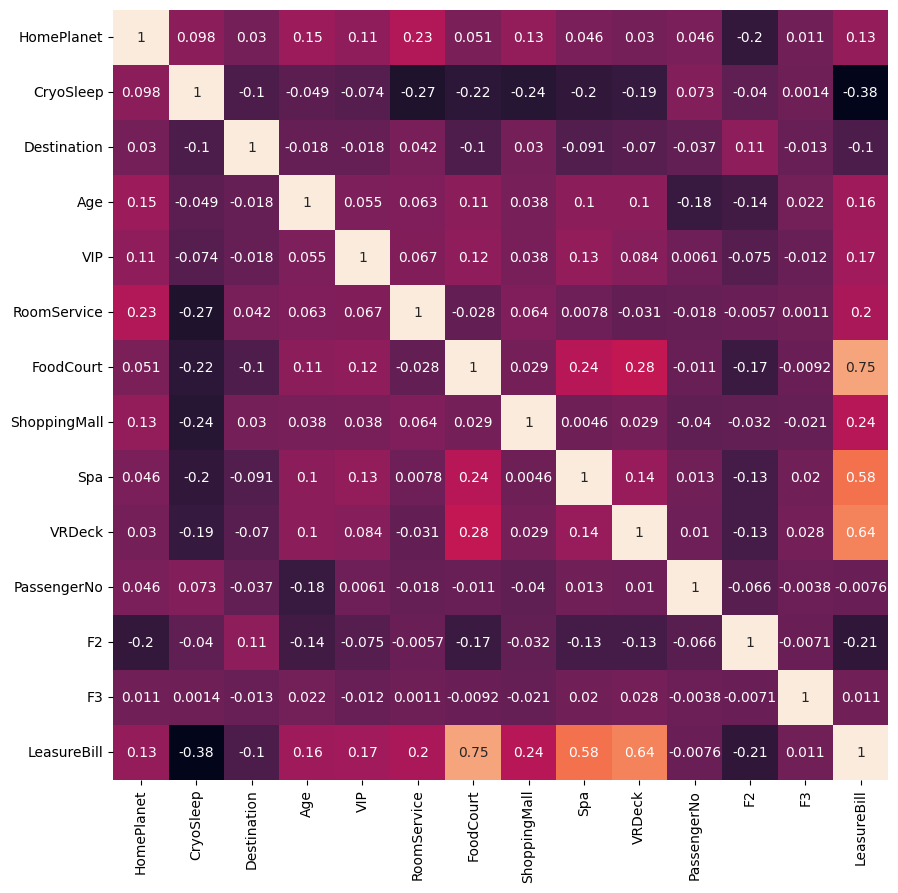

In [42]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [66]:
features = df.drop(['CryoSleep'], axis=1)
target = df.CryoSleep

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)

X_train.shape, X_val.shape


((3849, 13), (428, 13))

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [68]:
from sklearn.metrics import roc_auc_score as ras

In [69]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True)]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(Y_train, train_preds))

    val_preds = models[i].predict_proba(X_val)[:, 1]
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()


LogisticRegression() : 
Training Accuracy :  0.9811446663047335
Validation Accuracy :  0.9818523871796636

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.9998936527745462
Validation Accuracy :  0.988941656916053

SVC(probability=True) : 
Training Accuracy :  0

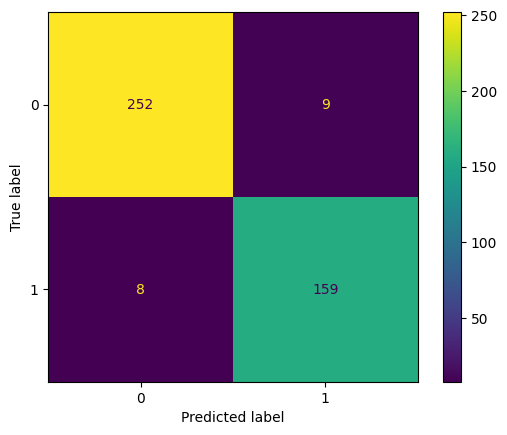

In [74]:
y_pred = models[1].predict(X_val)
cm = metrics.confusion_matrix(Y_val, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [71]:
print(metrics.classification_report
    (Y_val, models[1].predict(X_val)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       261
           1       0.95      0.95      0.95       167

    accuracy                           0.96       428
   macro avg       0.96      0.96      0.96       428
weighted avg       0.96      0.96      0.96       428

